<img style="float: left;;" src='Figures/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Clustering Jerárquico



<div class="alert alert-danger" style="margin: 10px">Diapos.</div>

## Métodos de Aglomeración

|Método               |                         | 
|:-------------------:|:------------------------------------------|
|**Complete**             | $d(u,v) = \max(d(u[i],k[i]),d(v[i],k[i]))$ |
|**Single**               | $d(u,v) = \min(d(u[i],k[i]),d(v[i],k[i]))$ |
|**Average**              | $d(u,v) = \frac{n_u d(u[i],k[i]) + n_v d(v[i],k[i])}{n_u + n_v}$|
|**Centroid**             | $d(u,v) = ||c_u - c_v ||_2 = \sqrt(\frac{n_u d(u[i],k[i]) + n_v d(v[i],k[i])}{n_u + n_v} - \frac{n_u n_v d(u[i],v[i])}{(n_u + n_v)^2})$                      |
|**Ward**                 | $d(u,v) = \sqrt(\frac{n_u d(u[i],k[i]) + (n_v + n_k) d(v[i],k[i]) - n_k d(u[i],v[i])}{n_u + n_v + n_k})$                      |



## Ejemplo de Clustering Jerárquico

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#Método para calcular los clusters usando el algoritmo de Clustering Jerárquico
from scipy.cluster import hierarchy

In [2]:
np.random.seed(100)
a = np.random.multivariate_normal([10,10], [[3,0],[0,3]], size=[100])
b = np.random.multivariate_normal([0,20], [[3,0],[0,3]], size=[100])
c = np.random.multivariate_normal([20,20], [[3,0],[0,3]], size=[100])

x = np.concatenate((a,b,c))

In [3]:
len(x)

300

In [4]:
x

array([[ 6.96931730e+00,  1.05935399e+01],
       [ 1.19971166e+01,  9.56276796e+00],
       [ 1.16996975e+01,  1.08906532e+01],
       [ 1.03830944e+01,  8.14663059e+00],
       [ 9.67178359e+00,  1.04416755e+01],
       [ 9.20667399e+00,  1.07537253e+01],
       [ 8.98918372e+00,  1.14148206e+01],
       [ 1.11651866e+01,  9.81915459e+00],
       [ 9.07979539e+00,  1.17835493e+01],
       [ 9.24112684e+00,  8.06301598e+00],
       [ 1.28041585e+01,  1.26701385e+01],
       [ 9.56373253e+00,  8.54085850e+00],
       [ 1.03195957e+01,  1.16230740e+01],
       [ 1.12661297e+01,  1.23582844e+01],
       [ 9.43493911e+00,  1.00964337e+01],
       [ 1.03852074e+01,  7.50027484e+00],
       [ 8.68995938e+00,  1.14141398e+01],
       [ 1.12998085e+01,  9.21027676e+00],
       [ 1.20604862e+01,  7.07176576e+00],
       [ 7.65064793e+00,  7.86536080e+00],
       [ 9.05700371e+00,  8.84269260e+00],
       [ 1.00126692e+01,  8.93835897e+00],
       [ 1.22512297e+01,  6.99819033e+00],
       [ 8.

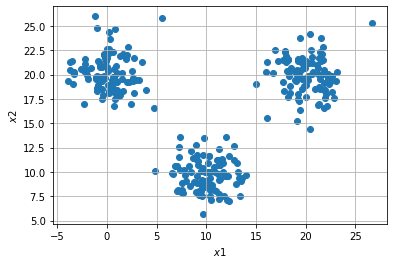

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(x[:,0], x[:,1])
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.grid()
plt.show()

In [6]:
help(hierarchy)

Help on module scipy.cluster.hierarchy in scipy.cluster:

NAME
    scipy.cluster.hierarchy

DESCRIPTION
    Hierarchical clustering (:mod:`scipy.cluster.hierarchy`)
    
    .. currentmodule:: scipy.cluster.hierarchy
    
    These functions cut hierarchical clusterings into flat clusterings
    or find the roots of the forest formed by a cut by providing the flat
    cluster ids of each observation.
    
    .. autosummary::
       :toctree: generated/
    
       fcluster
       fclusterdata
       leaders
    
    These are routines for agglomerative clustering.
    
    .. autosummary::
       :toctree: generated/
    
       linkage
       single
       complete
       average
       weighted
       centroid
       median
       ward
    
    These routines compute statistics on hierarchies.
    
    .. autosummary::
       :toctree: generated/
    
       cophenet
       from_mlab_linkage
       inconsistent
       maxinconsts
       maxdists
       maxRstat
       to_mlab_linkag

In [7]:
help(hierarchy.linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [8]:
Z = hierarchy.linkage(x, metric='euclidean', method= 'ward')

In [9]:
len(Z)

299

In [10]:
pd.DataFrame(Z)

,0,1,2,3
0,69.0,94.0,0.020460,2.0
1,43.0,53.0,0.042133,2.0
2,17.0,71.0,0.059228,2.0
3,232.0,233.0,0.066203,2.0
4,210.0,288.0,0.067657,2.0
...,...,...,...,...
294,580.0,593.0,20.460512,100.0
295,590.0,592.0,20.477964,100.0
296,589.0,591.0,21.356080,100.0
297,594.0,596.0,143.716414,200.0


In [11]:
help(hierarchy.dendrogram)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')
    Plot the hierarchical clustering as a dendrogram.
    
    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children. The top of the U-link indicates a
    cluster merge. The two legs of the U-link indicate which clusters
    were merged. The length of the two legs of the U-link represents
    the distance between the child clusters. It is also the
    cophenetic distance between original observations in the two
    children clusters.
    
    Parameters
    ----------
    Z : ndarray
        Th

## Criterios de selección de grupos


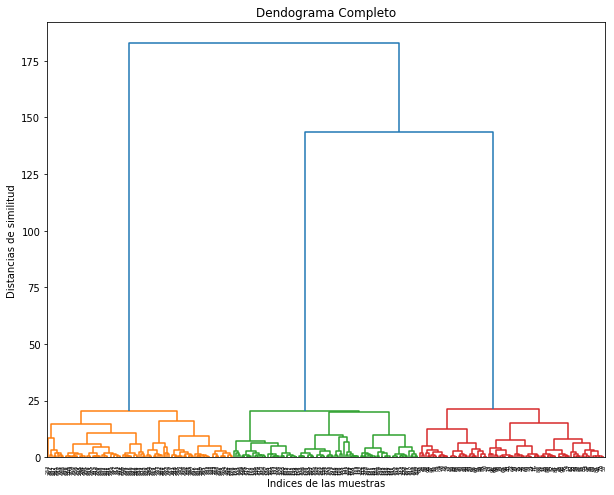

In [12]:
plt.figure(figsize=(10,8))
dn = hierarchy.dendrogram(Z)

plt.title('Dendograma Completo')
plt.xlabel('Indices de las muestras')
plt.ylabel('Distancias de similitud')
plt.show()

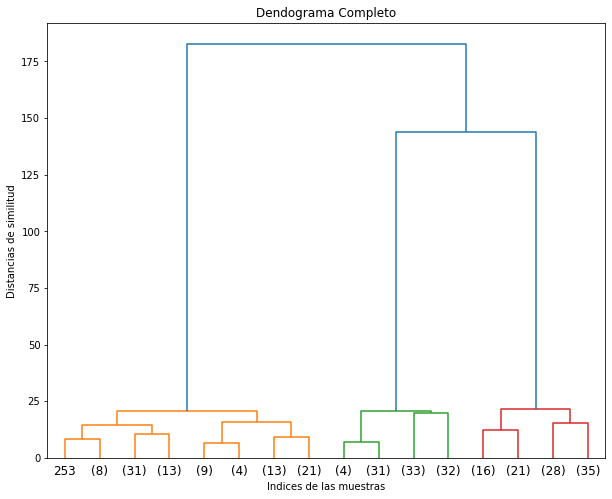

In [13]:
plt.figure(figsize=(10,8))
dn = hierarchy.dendrogram(Z, truncate_mode ='level', p=3)

plt.title('Dendograma Completo')
plt.xlabel('Indices de las muestras')
plt.ylabel('Distancias de similitud')
plt.show()

In [14]:
grupos_opt = 3
grupos_datos = hierarchy.fcluster(Z,grupos_opt, criterion='maxclust')
# Como tarea para investigar, qué hace el método fcluster ()
grupos_datos

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [15]:
len(grupos_datos)

300

In [16]:
X = pd.DataFrame(x, columns=['x1','x2'])
X['cluster'] = grupos_datos

In [17]:
X

,x1,x2,cluster
0,6.969317,10.593540,3
1,11.997117,9.562768,3
2,11.699697,10.890653,3
3,10.383094,8.146631,3
4,9.671784,10.441675,3
...,...,...,...
295,20.773926,20.257265,1
296,23.180579,20.241911,1
297,16.942595,22.507324,1
298,18.022381,21.292806,1


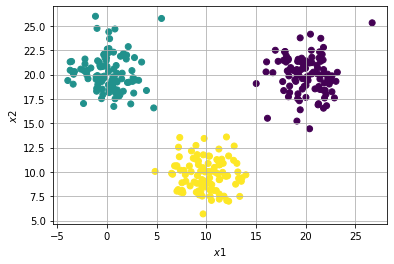

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(X['x1'].values, X['x2'].values, c=X['cluster'].values)
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.grid()
plt.show()

### Criterio del Codo (1er criterio)


In [19]:
pd.DataFrame(Z)

,0,1,2,3
0,69.0,94.0,0.020460,2.0
1,43.0,53.0,0.042133,2.0
2,17.0,71.0,0.059228,2.0
3,232.0,233.0,0.066203,2.0
4,210.0,288.0,0.067657,2.0
...,...,...,...,...
294,580.0,593.0,20.460512,100.0
295,590.0,592.0,20.477964,100.0
296,589.0,591.0,21.356080,100.0
297,594.0,596.0,143.716414,200.0


In [20]:
last = Z[-15:,2]
last_rev = last[::-1]
indx_group = np.arange(1, len(last_rev)+1)
indx_group

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [21]:
last_rev

array([182.86850948, 143.71641399,  21.35608009,  20.47796381,
        20.46051219,  19.84674171,  15.96890863,  15.30645742,
        14.48568101,  12.37055415,  10.56564073,   9.82646649,
         9.65246249,   9.37006433,   9.05267121])

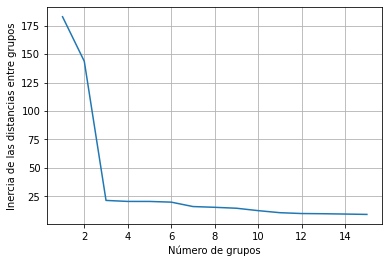

In [22]:
#Grafica del criterio del codo
plt.plot(indx_group, last_rev)
plt.xlabel('Número de grupos')
plt.ylabel('Inercia de las distancias entre grupos')
plt.grid()
plt.show()

In [23]:
#El número de grupos opt mediante el criterio del codo es 3
grupos_opt = 3
grupos_datos = hierarchy.fcluster(Z,grupos_opt, criterion='maxclust')
# Como tarea para investigar, qué hace el método fcluster ()
grupos_datos

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

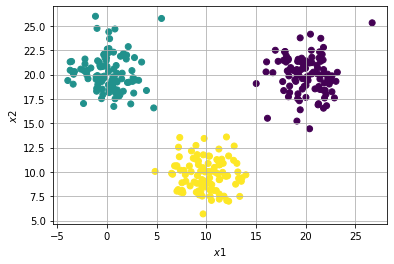

In [24]:
plt.figure(figsize=(6,4))
plt.scatter(X['x1'].values, X['x2'].values, c=X['cluster'].values)
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.grid()
plt.show()


In [25]:
def criterio_codo(Z, n_grupos):
    last = Z[-n_grupos:,2]
    last_rev = last[::-1]
    indx_group = np.arange(1,len(last_rev)+1)
    
    #Gráfica del codo
    plt.plot(indx_group, last_rev)
    plt.xlabel('Número de grupos')
    plt.ylabel('Inercia de las distancias entre grupos')
    plt.grid()
    plt.show()

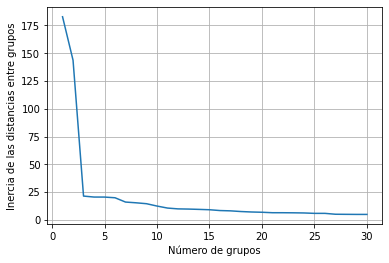

In [26]:
criterio_codo(Z, 30)

### Criterio del gradiente


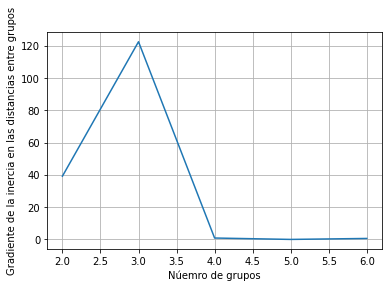

In [28]:
last = Z[-6:,2]
gradiente = np.diff(last)
grad_rev = gradiente[::-1]

indx_group = np.arange(2,len(grad_rev)+2)

#Graficar el criterio del gradiente
plt.plot(indx_group, grad_rev)
plt.xlabel('Núemro de grupos')
plt.ylabel('Gradiente de la inercia en las distancias entre grupos')
plt.grid()
plt.show()

In [29]:
def criterio_gradiente(Z, n_grupos):
    last = Z[-n_grupos:,2]
    gradiente = np.diff(last)
    grad_rev = gradiente[::-1]

    indx_group = np.arange(2,len(grad_rev)+2)

    #Graficar el criterio del gradiente
    plt.plot(indx_group, grad_rev)
    plt.xlabel('Número de grupos')
    plt.ylabel('Gradiente de la inercia en las distancias entre grupos')
    plt.grid()
    plt.show()

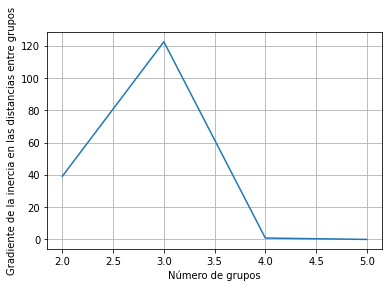

In [30]:
criterio_gradiente(Z, 5)

## Aplicar número de grupos opt

In [31]:
#El número de grupos opt mediante el criterio del codo es 3
grupos_opt = 3
grupos_datos = hierarchy.fcluster(Z,grupos_opt, criterion='maxclust')
# Como tarea para investigar, qué hace el método fcluster ()
grupos_datos

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

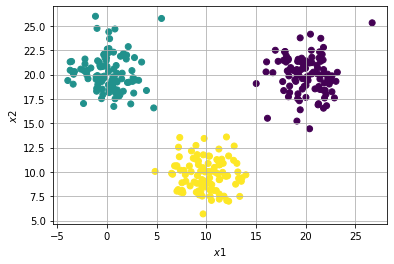

In [32]:
plt.figure(figsize=(6,4))
plt.scatter(X['x1'].values, X['x2'].values, c=X['cluster'].values)
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.grid()
plt.show()

## Ejemplo 2: 

Consideremos el datasety `shopping-data.csv`, este dataset contiene información sobre el ingreso anual y gastos de clientes de una empresa.

Conservaremos las columnas Ingresos anuales (en miles de dólares) y Puntuación de gastos (1-100). La columna Spending Score indica la frecuencia con la que una persona gasta dinero en un centro comercial en una escala del 1 al 100, siendo 100 el que más gasta.

In [33]:
data = pd.read_csv('shopping-data.csv')

In [34]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
data_split = data.iloc[:,-2:]

In [36]:
data_split.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [37]:
data_split.values

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

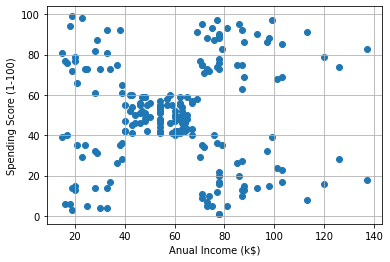

In [38]:
# Visualizar los datos Anual income vs Spending Score
plt.figure(figsize=(6,4))
plt.scatter(data_split.values[:,0],data_split.values[:,1])
plt.xlabel('Anual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()

In [39]:
#Aplicar el clustering Jerárquico (Elegir el criterio de linkage, metrica de similitud)
#Decidir cuántos grupos seleccionar para la clusterización
# - Dendrogramna
# - C. codo
# - C. Gradiente
# Graficar los datos con la clusterización (con sus grupos correspondientes)


In [40]:
Z = hierarchy.linkage(data_split.values, metric='euclidean', method='ward')

In [41]:
pd.DataFrame(Z)

,0,1,2,3
0,65.0,68.0,0.000000,2.0
1,48.0,49.0,0.000000,2.0
2,156.0,158.0,0.000000,2.0
3,129.0,131.0,0.000000,2.0
4,21.0,23.0,1.000000,2.0
...,...,...,...,...
194,384.0,386.0,113.886017,32.0
195,391.0,392.0,245.654601,108.0
196,387.0,395.0,262.562634,129.0
197,393.0,394.0,394.859658,71.0


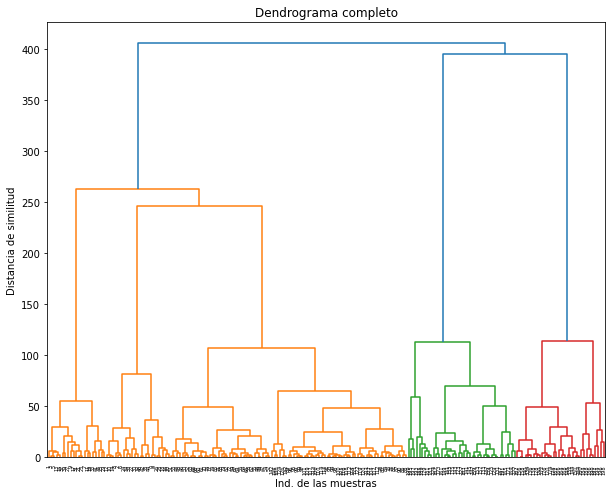

In [42]:
# Dendrograma
plt.figure(figsize=(10,8))
dn = hierarchy.dendrogram(Z)
plt.title('Dendrograma completo')
plt.xlabel('Ind. de las muestras')
plt.ylabel('Distancia de similitud')
plt.show()

In [43]:
#Con el dendrograma de arriba se puede conlcuir que podemos agrupar con 5 grupos

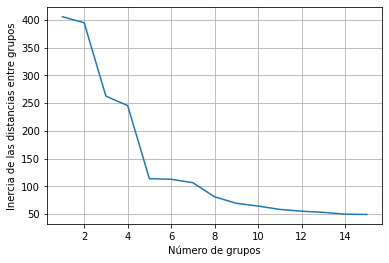

In [44]:
#Criterio del codo
criterio_codo(Z, 15)

In [45]:
# Con el criterio del codo se puede concluir que tenemos 5 o 7 grupos

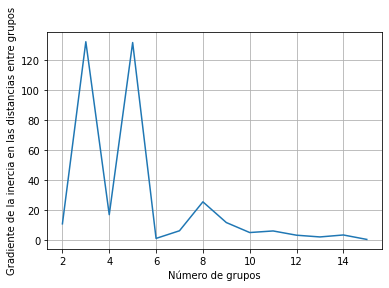

In [46]:
#Criterio del codo
criterio_gradiente(Z, 15)

In [47]:
# COn el criterio del gradiente se puede observar que se puede clusterizar con 3, 5 o 7, 8

In [48]:
grup_opt =3
grupos_datos = hierarchy.fcluster(Z, grup_opt, criterion='maxclust')


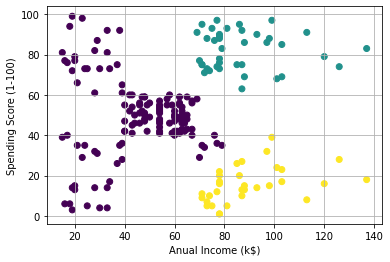

In [49]:
# Visualizar los datos Anual income vs Spending Score
plt.figure(figsize=(6,4))
plt.scatter(data_split.values[:,0],data_split.values[:,1], c=grupos_datos)
plt.xlabel('Anual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()

# Actividad: 

**1.- Obtener una clusterización mediante clustering jerárquico del dataset anterior ('shopping-data.csv') utilizando las columnas:**

- Gender
- Age
- Anual Income
- Spending Score

 **2.- Discretización por Clustering Jerárquico: Con base a las discretizaciones del conjunto de datos contenido en 'dataKmeans.csv', obtenga una discretización mediante clustering Jeráquico.**

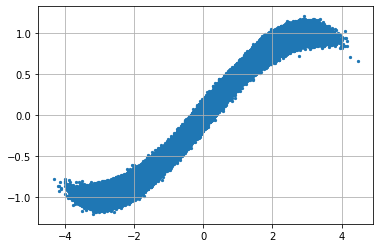

In [53]:
from sklearn.linear_model import LinearRegression

df=pd.read_csv('dataKmeans.csv')
plt.scatter(df.x,df.y,s=5)
plt.grid()

In [54]:
# Modelo con datos sin discretizar
lin_SD=LinearRegression()
lin_SD.fit(df[['x']],df['y'])
predict_SD=lin_SD.predict(df[['x']])
